# Intro to Machine Learning

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# making a dict to unique-lize repeating elements 
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### Examining the Data

In [4]:
# splitting training & testing data
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

<IPython.core.display.Javascript object>


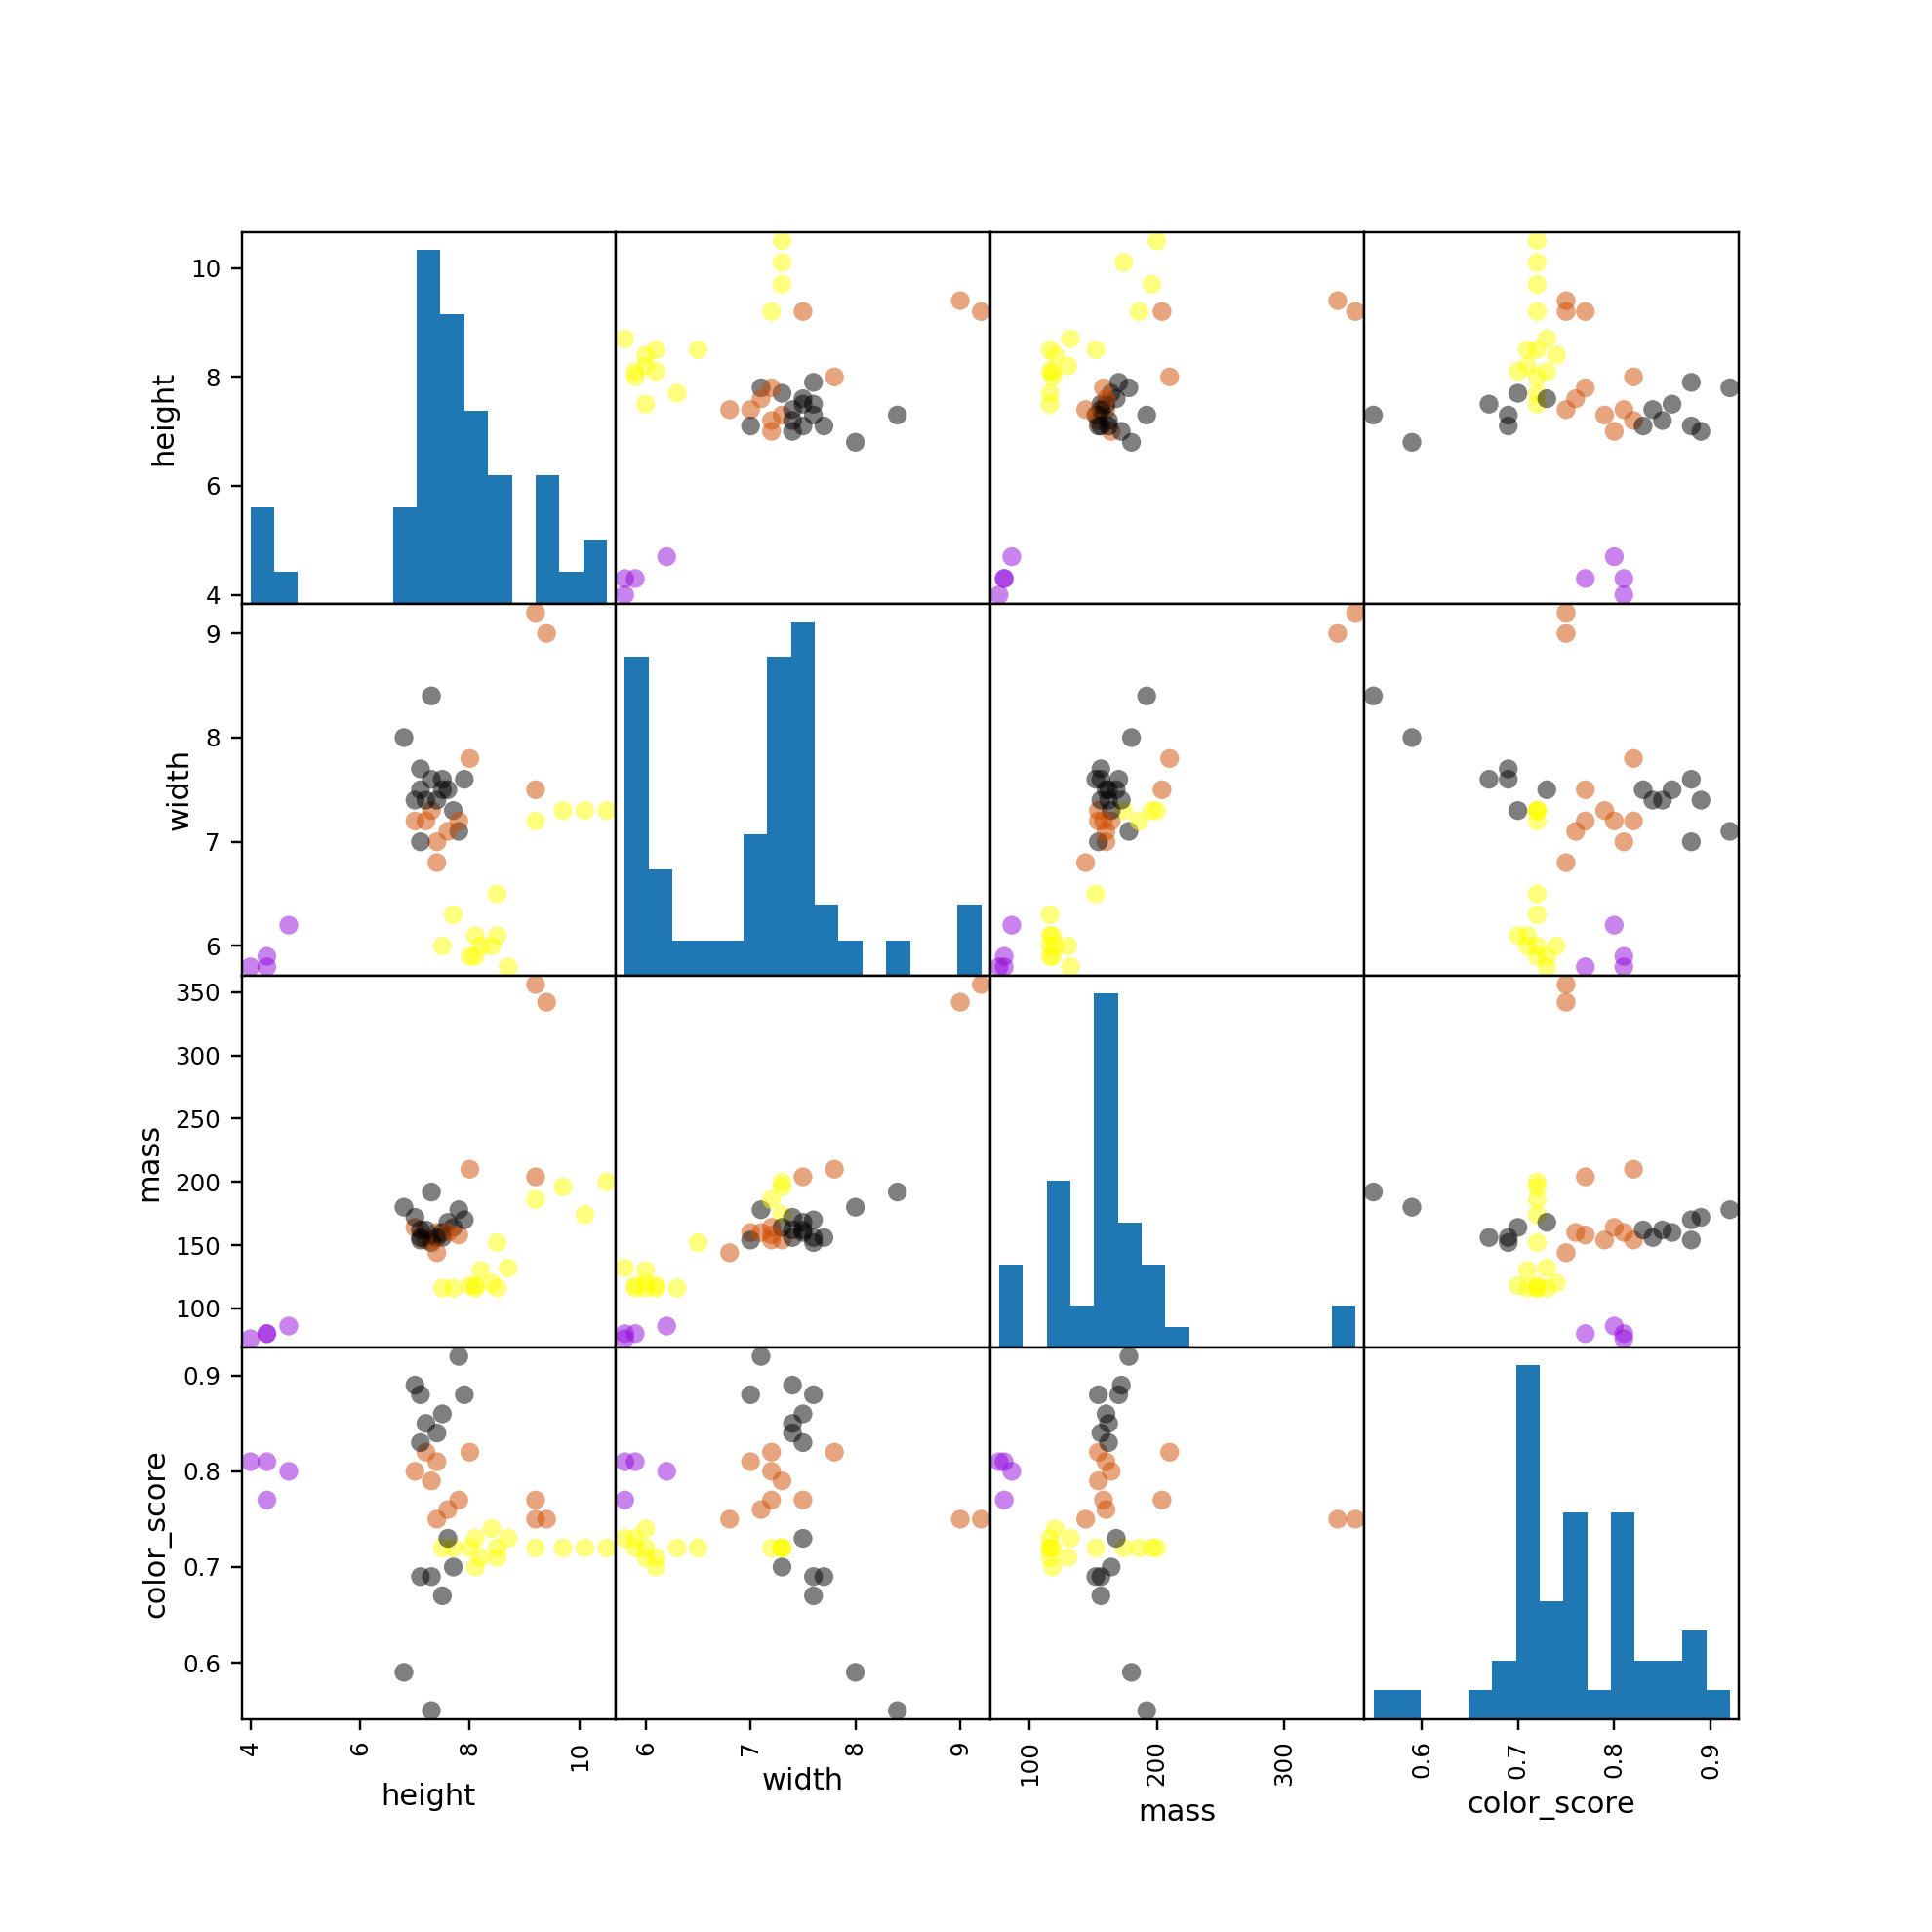

In [5]:
# make a scatter matrix
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>


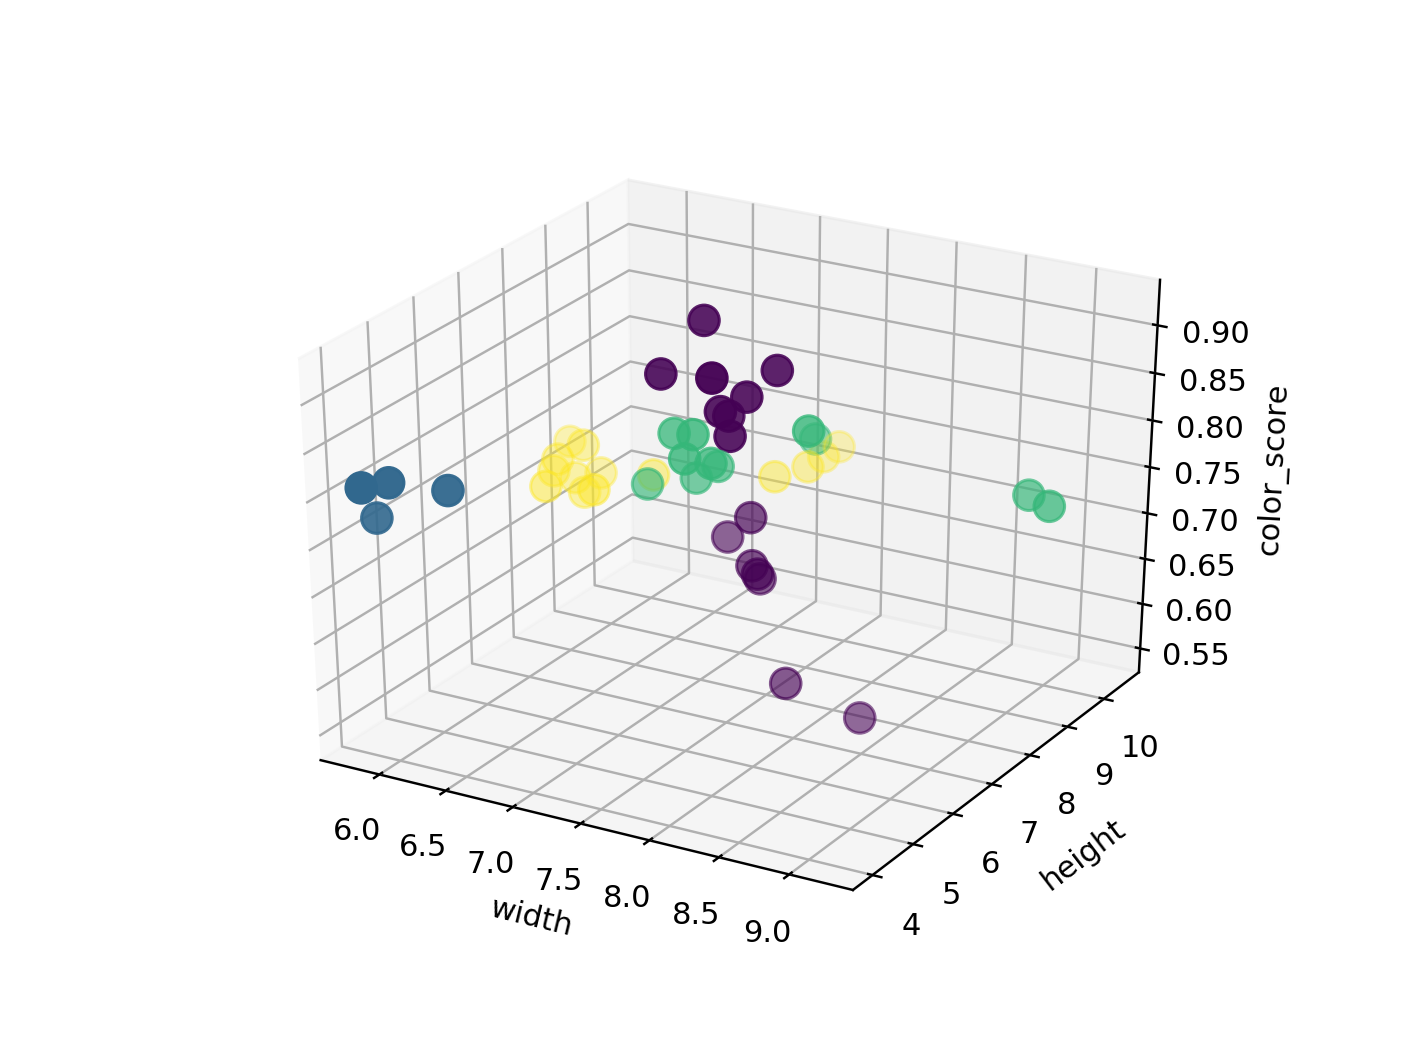

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create Train-Test Split

In [7]:
# create the split
X = fruits[['mass','width','height']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

### Create classifier object

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Train the Classifier (Fit the Estimator) Using the Training Data

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Estimate the Accuracy of the Classifier on Future Data, Using the Test Data

In [10]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the Trained k-NN Classifier Model to Classify New, Previously Unseen Objects

In [11]:
# example 1: a thing with 20g mass, 4.3 cm, width and 5.5cm height
fruit_prediction = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [12]:
# example 2: a thing with 100g mass, 6.3 cm, width and 8.5cm height
fruit_prediction = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

In [13]:
# example 3: a thing with 1g mass, 0.1 cm, width and 0.1cm height
fruit_prediction = knn.predict([[1,0.1,0.1]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [14]:
# example 4: a thing with 10000g mass, 0.1 cm, width and 0.1cm height
fruit_prediction = knn.predict([[10000,0.1,0.1]])
lookup_fruit_name[fruit_prediction[0]]

'orange'

### Plot the Decision Boundaries of the k-NN Classifier

In [15]:
# AttributeError: 'DataFrame' object has no attribute 'as_matrix'
# probably old python error

# from adspy_shared_utilities import plot_fruit_knn
# plot_fruit_knn(X_train, y_train, 5, 'uniform')

### How Sensitive is k-NN Classification Accuracy to the Choice of the 'k' Parameter

<IPython.core.display.Javascript object>


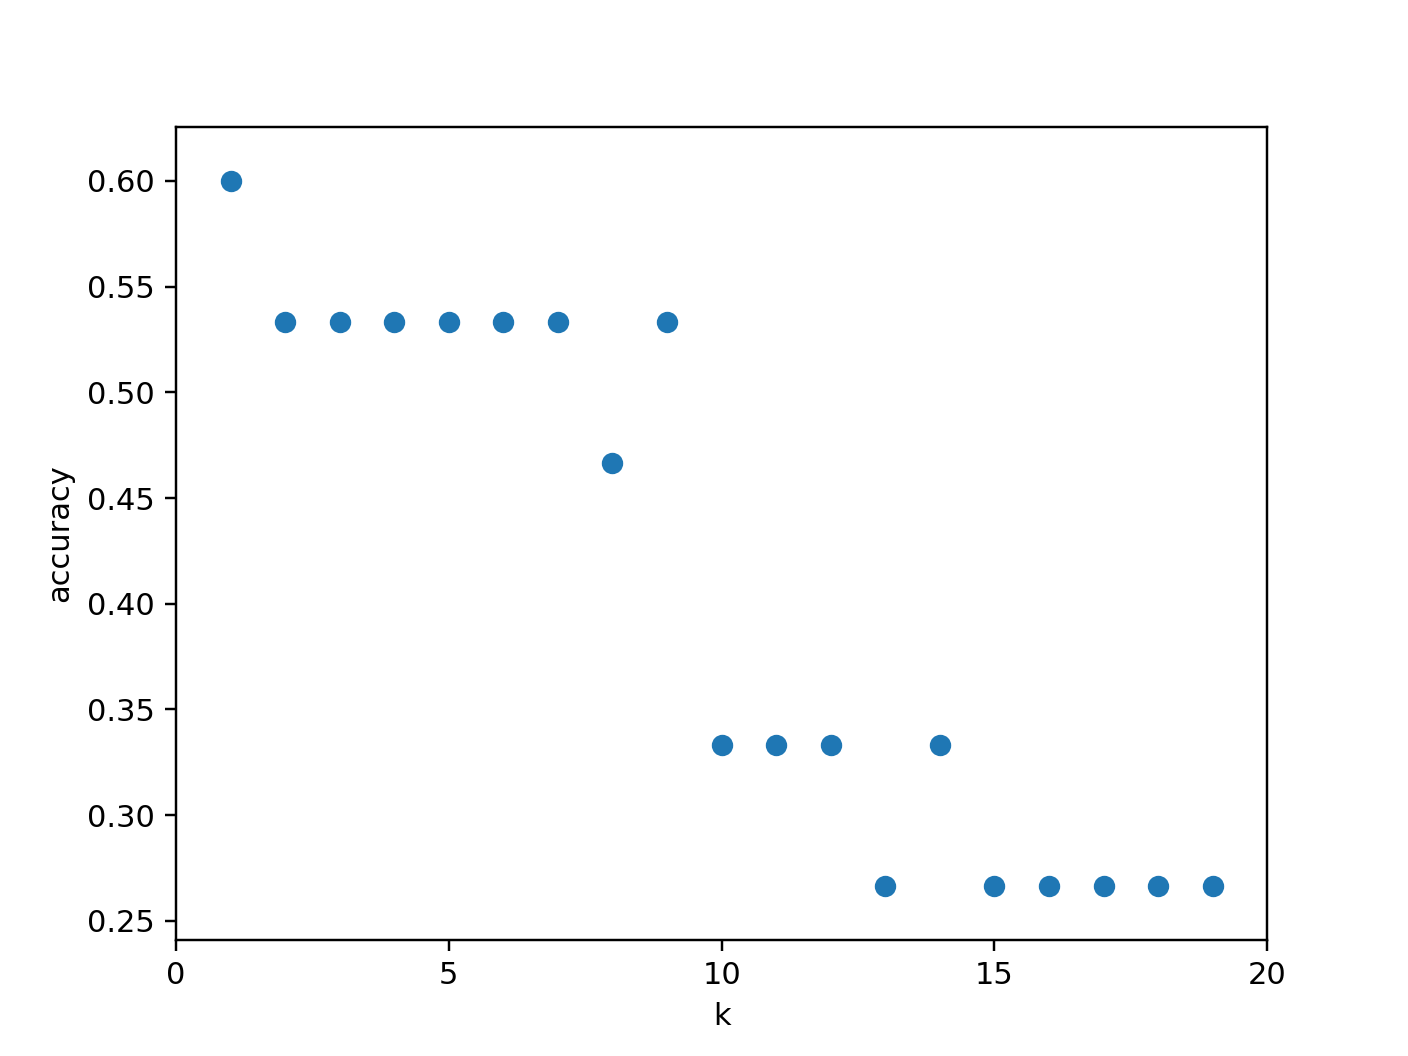

([<matplotlib.axis.XTick at 0x124061130>,
 <a list of 5 Text xticklabel objects>)

In [16]:
#seems the smaller k is(or closer to 1), the more accurate it is
k_range = range(1,20)
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

<IPython.core.display.Javascript object>


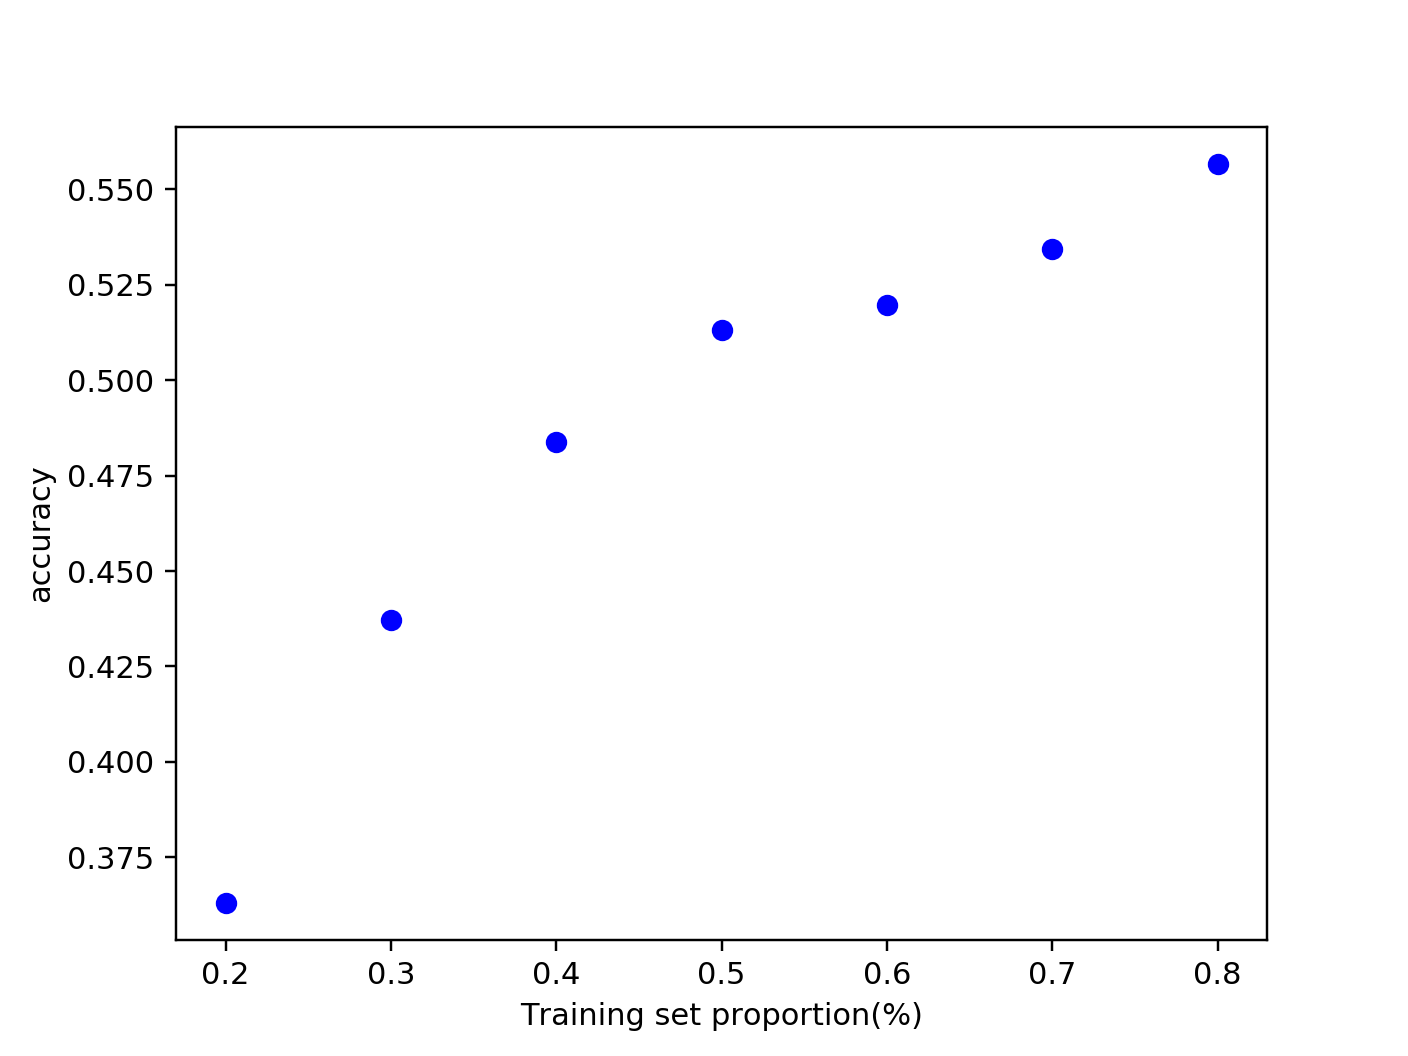

Text(0, 0.5, 'accuracy')

In [17]:
#relation between size of training set to accuracy
t = [0.8,0.7,0.6,0.5,0.4,0.3,0.2]
knn=KNeighborsClassifier(n_neighbors=5)
plt.figure()
for s in t:
    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test,y_test))
    plt.plot(s,np.mean(scores),'bo')
plt.xlabel('Training set proportion(%)')
plt.ylabel('accuracy')